In [164]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
X = []
y = []

In [167]:
def loadDataSet():
    f=open('/content/drive/MyDrive/Nafis_Ovi/Question5.txt')
    # Read data line by line and use strip to remove the Spaces
    for line in f.readlines():
        nline=line.strip().split()
        # X has two columns
        X.append([float(nline[0]),float(nline[1])])
        y.append(int(nline[2]))
    return mat(X).T,mat(y)

In [168]:
X,y=loadDataSet()

In [169]:
X.shape

(2, 100)

In [170]:
def sigmoid(x):
     sigm = 1/(1+exp(-x))

     return sigm

In [171]:
J = []
y_hat = []

In [172]:
def Logistic(X,y,W,b,n,alpha,iterations):

    '''
    X: input data
    y: labels
    W: weight
    b: bias
    n: number of samples
    alpha: learning rate
    iterations: the number of iteration
    '''

    J = zeros((iterations,1))
    y_hat = zeros((1,n))
    for i in range(iterations):

        # step1 forward propagation
        #==========
        #todo '''complete forward propagation equation'''
        #==========

        fp = None
        fp = sigmoid(np.dot(W,X) + b)

        # compute cost function
        #==========
        #todo '''complete compute cost function equation'''
        #==========

        cost = -1/n * np.sum( np.multiply(np.log(fp), y) + np.multiply(np.log(1-fp), (1-y)))
        J[i] = cost

        # step2 backpropagation
        #==========
        #todo '''complete backpropagation equations'''
        #==========
        dw = (1/n) * np.dot(X, (fp - y).T)
        db = (1/n) * np.sum(fp - y)

        #db = (1/n) * np.sum(fp - y, axis = 1)

        # step3 gradient descent
        #==========
        #todo '''complete gradientdescent equations'''
        #==========
        W = W - alpha * dw
        b = b - alpha * db

        if i < fp.shape[1]:  # Check if i is within the valid column indices of fp
          if fp[0, i] > 0.5:
            y_hat[0, i] = 1
          else:
            y_hat[0, i] = 0


        # if fp[0,i] > 0.5:
        #     y_hat[0,i] = 1
        # else:
        #     y_hat[0,i] = 0

    return y_hat,W,b,J

In [173]:
def plotBestFit(X,y,J,W,b,n,y_hat):

    '''
    X: input data
    y: labels
    J: cost values
    W: weight
    b: bias
    n: number of samples
    y_hat: the predict labels from Logistic Regression
    '''

    # Plot cost function figure
    #==========
    plt.title('The Cost function')
    plt.plot(J,label="loss")
    plt.xlabel('Epcho')
    plt.ylabel('Loss')
    plt.show()
    #==========

    # Plot the final classification figure
    #==========
    x1 = (-W[0] * X[:,0]) / W[1]
    x2 = (-W[0] * X[:,1]) / W[1]

    colors = [i for i in y]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.title('Scatter value of the final classification')
    ax1.scatter([X[0][:,:]],[X[1][:,:]],c=colors,marker="s",label='X')
    plt.plot(x1,x2,c='b',marker="o")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    #==========

    plt.show()

In [174]:
num = X.shape[0]  # number of features
n = X.shape[1] # number of samples

In [175]:
# Initianlize the weights and bias
#==========
#todo '''complete the code to initianlize the weights and bias'''
#==========
W = [random.uniform(0, 1), random.uniform(0, 1)]
W = np.asmatrix(W)
b = random.uniform(0, 1)

In [176]:
# Learning rate
#==========
#todo '''try different learning rates''
#==========

#[0.001, 0.01, 0.003, 0.005]
alpha= 0.005

In [177]:
# Iterations
#==========
#todo '''try different Iterations''
#==========
#[100, 200, 300, 500,1000]
iterations = 500

In [178]:
# Get the results from Logistic function
y_hat,W,b,J = Logistic(X, y, W, b, n, alpha, iterations)

<ipython-input-172-0c06c5244595>:30: RuntimeWarning: divide by zero encountered in log
  cost = -1/n * np.sum( np.multiply(np.log(fp), y) + np.multiply(np.log(1-fp), (1-y)))
<ipython-input-172-0c06c5244595>:30: RuntimeWarning: invalid value encountered in multiply
  cost = -1/n * np.sum( np.multiply(np.log(fp), y) + np.multiply(np.log(1-fp), (1-y)))


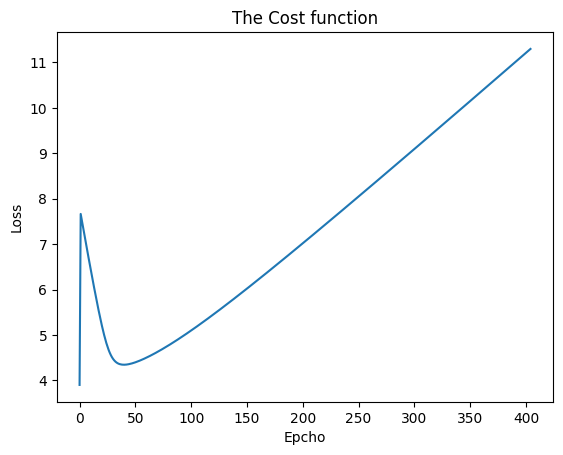

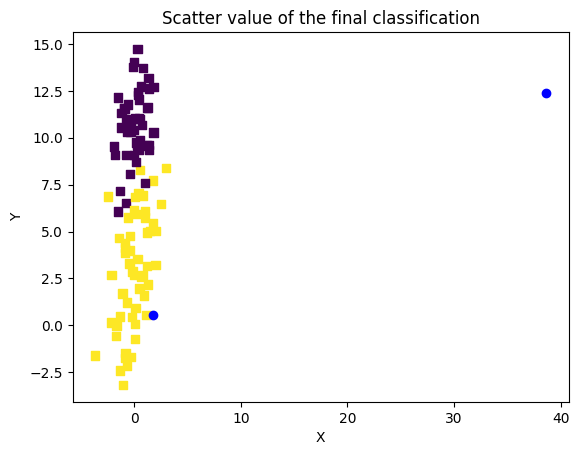

In [179]:
# Plot figures
plotBestFit(X, y, J, W, b, n, y_hat)